**THE SPARKS FOUNDATION**

**DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP- GRIP AUG 2021**

By- Devanshi Sinha

---

Task 1- Prediction using Supervised ML

*To predict the percentage of a student based on the number of study hours*

In [1]:
# Importing all the required libraries in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sp
%matplotlib inline

In [2]:
# Reading the data from the remote link
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)

# Displaying the first 10 rows of the dataframe
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Printing the type of data
print("student_data is of type", type(student_data)) 

student_data is of type <class 'pandas.core.frame.DataFrame'>


In [4]:
# Checking for the null values in each column
student_data.isnull().any()

Hours     False
Scores    False
dtype: bool

In [5]:
# Simultaneously counting the number of study hours and scores
student_data[["Hours", "Scores"]].value_counts()

Hours  Scores
9.2    88        1
4.5    41        1
1.5    20        1
1.9    24        1
2.5    21        1
       30        1
2.7    25        1
       30        1
3.2    27        1
3.3    42        1
3.5    30        1
3.8    35        1
4.8    54        1
8.9    95        1
5.1    47        1
5.5    60        1
5.9    62        1
6.1    67        1
6.9    76        1
7.4    69        1
7.7    85        1
7.8    86        1
8.3    81        1
8.5    75        1
1.1    17        1
dtype: int64

**VISUALIZING THE GIVEN DATA**

Plotting the data points on a 2-D graph to visualize the distribution of scores and study hours.

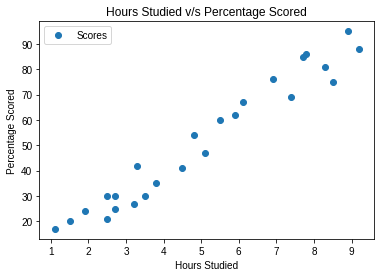

In [6]:
student_data.plot(x='Hours', y='Scores', title= "Hours Studied v/s Percentage Scored",style='o')
plt.style.use('seaborn')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()

In [7]:
# Calculating the Pearson's correlation coefficient between Hours Studied and Percentage Scored
student_data.corr(method='pearson') 

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


We can see there is a positive linear relation between the number of hours studied and the percentage scored.

**PREPARING THE DATA**

In the next few steps we divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
x = student_data.iloc[:,: -1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
y = student_data.iloc[:, 1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [10]:
from sklearn.model_selection import train_test_split    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

**TRAINING THE ALGORITHM**

We have split our data into training and testing sets, and now is finally the time to train our algorithm

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


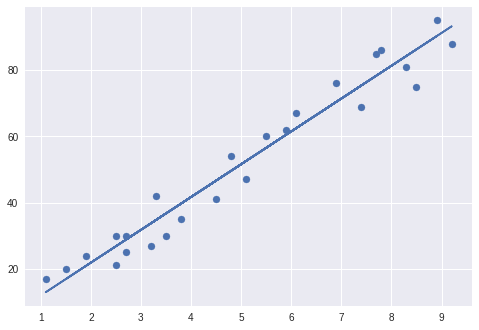

In [12]:
# Plotting the regression line
line = regressor.coef_*x + regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

**MAKING PREDICTIONS**

Now that we have trained our algorithm, it's time to make some predictions.

In [13]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores
print("\n Predicted scores are: ", y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]

 Predicted scores are:  [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [14]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


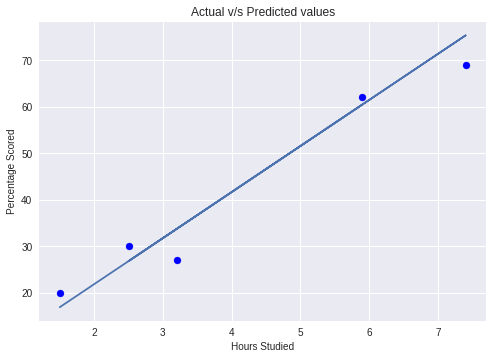

In [15]:
# Visually comparing the actual and the predicted data
plt.scatter(x = x_test, y = y_test, color = 'blue')
plt.plot(x_test, y_pred);
plt.title('Actual v/s Predicted values')
plt.xlabel('Hours Studied', size = 10)
plt.ylabel('Percentage Scored', size = 10)
plt.show()

**EVALUATING THE MODEL**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, we will use the following two commonly used evaluation metrics among others:

1. Mean Absolute Error

2. Root Mean Squared Error

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Root Mean Squared Error: 4.647447612100373


**What will be the predicted score if a student studies for 9.25 hours/day ?**

In [23]:
# To test with own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print(" For {}".format(hours[0][0]), end = " ")
print("hours studied in a day, student's predicted score will be = {}".format(own_pred[0]))

 For 9.25 hours studied in a day, student's predicted score will be = 93.69173248737539


**CONCLUSION:**

According to the above given algorithm, we can see that if a student studies for 9.25 hours in a day, then he/she will secure 93.691 marks.